## Basics

In [1]:
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

In [2]:
import random
from typing import Literal
from typing_extensions import TypedDict

class State(TypedDict):
    graph_state: str
    

def first_node(state):
    print("First node is called!")
    return { "graph_state": state['graph_state'] + "I am playing " }

def second_node(state):
    print("Second node is called!!")
    return { "graph_state": state['graph_state'] + "cricket" }

def third_node(state):
    print("Third node is called!!!")
    return { "graph_state": state["graph_state"] + "football" }

def decide_play(state) -> Literal["second_node", "third_node"]:
    graph_state = state["graph_state"]
    
    if random.random() < 0.5:
        return "second_node"
    
    return "third_node"

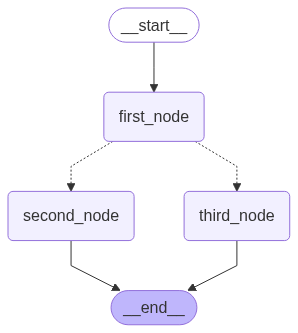

In [5]:
# Building Graph
from IPython.display import display, Image
from langgraph.graph import START, END, StateGraph

builder = StateGraph(State)

builder.add_node("first_node", first_node)
builder.add_node("second_node", second_node)
builder.add_node("third_node", third_node)

builder.add_edge(START, "first_node")
builder.add_conditional_edges("first_node", decide_play)
builder.add_edge("second_node", END)
builder.add_edge("third_node", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

## Chatbot

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

# Define state
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [13]:
from dotenv import load_dotenv
from langchain_groq import ChatGroq

# Load environment variables
load_dotenv()

# Define Gemma model
llm = ChatGroq(model="gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000243B3A65590>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000243B3A65F90>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [8]:
def chatbot(state: State):
    return { "messages": [llm.invoke(state["messages"])]}

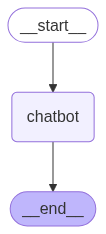

In [11]:
from langgraph.graph import START, END, StateGraph

builder = StateGraph(State)
builder.add_node("chatbot", chatbot)

builder.add_edge(START, "chatbot")
builder.add_edge("chatbot", END)

graph = builder.compile() 
graph

In [14]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: Hi there! 👋

How can I help you today?

Assistant: Imagine you're teaching a dog a new trick. You show it what to do, reward it when it gets it right, and correct it when it makes mistakes. Over time, the dog learns the trick through these examples and feedback.

Machine learning is similar! It's a type of artificial intelligence where computers learn from data instead of being explicitly programmed. 

Here's a breakdown:

**Key Concepts:**

* **Data:** Machine learning algorithms learn from vast amounts of data. This data can be anything: images, text, numbers, audio, etc.
* **Algorithms:** These are sets of instructions that the computer uses to analyze the data and learn patterns.
* **Training:** This is the process of feeding the algorithm data and letting it learn.

**How it Works:**

1. **Data Collection:** Gather relevant data for the task you want the machine to learn.

2. **Data Preparation:** Clean and organize the data so the algorithm can understand it.

3. **Alg